# Cosine similarities
This notebook illustrates how to calculate and display cosine similarities between wordvectors.
As input, we use a file with embeddings generated by [embiggen](https://pypi.org/project/embiggen/]) together
with a file with the corresponding word labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import cosine
from collections import defaultdict
from sklearn.cluster import DBSCAN


The following code allows us to import the ``kcet`` module from the local repository.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from kcet import Wordvec2Cosine

The constructor of ``Wordvec2Cosine`` loads the word embeddings and words into a pandas dataframe.

In [3]:
data_directory = 'data/embeddings_final'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
embedding_file = os.path.join(data_directory, "embedding_SG_dim100_upto2020.npy")
words_file = os.path.join(data_directory, "words_SG_upto2020.txt")
w2c = Wordvec2Cosine(embeddings=embedding_file, words=words_file)
df = w2c.get_embeddings()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
cell,2.892186,-4.601290,1.886768,3.363972,5.323241,2.037415,-4.547163,2.887746,0.078090,-6.857232,...,-2.348537,4.792399,3.246019,-3.045483,-4.771703,6.965374,-1.852824,0.788342,0.692204,8.816134
patient,3.030980,-4.654769,1.988458,3.286587,4.494266,4.335152,-3.879949,1.414752,0.948940,-4.057512,...,-1.655231,5.274243,5.277645,-1.659015,-4.128818,5.872729,-3.746760,1.387476,-0.132648,8.704845
meshd009369,3.125736,-5.037050,1.834232,3.044192,4.652200,3.345147,-2.471191,2.407151,0.459735,-5.215952,...,-1.343417,3.949077,5.909581,-3.753628,-5.255637,6.504014,-3.489765,1.265763,0.166798,9.207653
0,3.207781,-5.854365,2.169951,2.806666,3.704714,4.489932,-3.641227,2.849144,1.368201,-5.305769,...,-1.802601,4.349891,5.042999,-1.330444,-3.057492,6.769782,-4.191097,0.704711,0.271818,7.927824
study,3.093263,-3.081187,1.896351,3.586287,3.835986,3.025896,-3.602392,3.394049,0.388296,-4.770427,...,-1.487065,4.371748,4.851753,-3.033936,-4.145646,6.956510,-3.810457,0.859616,0.380740,8.665388


## Top n most similar words
We retrieve the top n most similar words. The function ``n_most_similar_words`` returns a list of tuples,
and ``n_most_similar_words_df`` returns a Pandas dataframe.

In [4]:
target_word ='meshd007938' # Leukemia Leukemias
n=51
top_cosine_similarities_leukemia = w2c.n_most_similar_words_df(target_word=target_word, n=n)

In [5]:
top_cosine_similarities_leukemia.head(n=11)

,word,similarity
0,meshd007938,1.000000
1,meshd007951,0.993106
2,meshd007945,0.990139
3,all,0.990110
4,meshd054198,0.989976
5,leukaemic,0.989619
6,meshd015470,0.989493
7,hl,0.987738
8,meshd054218,0.987608
9,meshd015458,0.987493


In [6]:
target_word = 'ncbigene695' #BTK
n = 51
top_cosine_similarities_btk = w2c.n_most_similar_words_df(target_word=target_word, n=n)

In [7]:
top_cosine_similarities_btk.head(n=11)

,word,similarity
0,ncbigene695,1.000000
1,ncbigene3718,0.994254
2,ncbigene6850,0.992690
3,ncbigene613,0.991577
4,ncbigene4352,0.991499
5,ncbigene3716,0.991427
6,ncbigene3717,0.991047
7,ncbigene7294,0.990961
8,t315i,0.990950
9,ncbigene4067,0.990340


In [8]:
target_word ='meshd001943' #breast neoplasms
n=51
top_cosine_similarities_bc = w2c.n_most_similar_words_df(target_word=target_word, n=n)

In [9]:
top_cosine_similarities_bc.head(n=11)

,word,similarity
0,meshd001943,1.000000
1,bc,0.989857
2,meshd016889,0.986028
3,tnbc,0.985317
4,meshd013629,0.985056
5,ncbigene2099,0.983090
6,breast,0.983045
7,meshd000071960,0.982668
8,premenopausal,0.982584
9,bcs,0.982109


## Top n least similar words

In [10]:
target_word ='meshd007938' # Leukemia Leukemias
n = 50
least_cosine_similarities_leukemia  = w2c.n_least_similar_words_df(target_word=target_word,n=n)

In [11]:
least_cosine_similarities_leukemia.head(n=10)

,word,similarity
0,truncated,-0.183968
1,fonc,-0.176199
2,jospt,-0.164590
3,hippokratia,-0.145121
4,nct01368289,-0.143017
5,yudong,-0.136322
6,actabiomedica,-0.128431
7,daniela,-0.121251
8,issuetoc,-0.108463
9,belg,-0.103743


In [12]:
target_word ='meshd001943' #breast neoplasms
n = 50
least_cosine_similarities_bc  = w2c.n_least_similar_words_df(target_word=target_word,n=n)

In [13]:
least_cosine_similarities_bc.head(n=10)

,word,similarity
0,fonc,-0.195877
1,yudong,-0.141697
2,truncated,-0.132812
3,2374289517715040,-0.127368
4,lauc,-0.126602
5,jospt,-0.125157
6,daniela,-0.123881
7,nct01368289,-0.119329
8,issuetoc,-0.114522
9,hippokratia,-0.113356


In [14]:
target_word = 'ncbigene695' #BTK
n = 50
least_cosine_similarities_btk  = w2c.n_least_similar_words_df(target_word=target_word,n=n)

In [15]:
least_cosine_similarities_btk.head(n=10)

,word,similarity
0,fonc,-0.201196
1,truncated,-0.183234
2,issuetoc,-0.165232
3,yudong,-0.149916
4,jospt,-0.149368
5,nct01368289,-0.149188
6,tpdb,-0.143636
7,hippokratia,-0.141246
8,daniela,-0.134588
9,actabiomedica,-0.122990


## n words with close to zero cosine similarity scores

In [ ]:
target_word ='meshd007938' # Leukemia Leukemias
n = 50
e = 0.1 #absolute cosine similarity scores less than e are considered as coine similarity scores close to zero
close_to_zero_similarities_leukemia  = w2c.n_close_to_zero_similar_words_df(target_word=target_word,n=n,e=e)

In [ ]:
close_to_zero_similarities_leukemia.head()

In [ ]:
close_to_zero_similarities_leukemia.shape[0]

In [ ]:
target_word ='meshd001943' # breast neoplasms
n = 50
e = 0.1 #cosine similarity scores less than e are considered as coine similarity scores close to zero
close_to_zero_similarities_breast_neoplasms  = w2c.n_close_to_zero_similar_words_df(target_word=target_word,n=n,e=e)

In [ ]:
close_to_zero_similarities_breast_neoplasms.head()

In [ ]:
close_to_zero_similarities_breast_neoplasms.shape[0]

In [ ]:
target_word = 'ncbigene695' #BTK 
n = 50
e = 0.1 #cosine similarity scores less than e are considered as coine similarity scores close to zero
close_to_zero_similarities_btk = w2c.n_close_to_zero_similar_words_df(target_word=target_word,n=n,e=e)

In [ ]:
close_to_zero_similarities_btk.head()

In [ ]:
close_to_zero_similarities_btk.shape[0]

## t-SNE plot of the most and least similar words

In [16]:
def embeddings_similar_words(cosine_similarities_df, n):#get the embeddings of words
    words = []
    for i in range(1,n):
        word = cosine_similarities_df.iloc[i][0]
        words.append(word)
    similar_words_embeddings_df = df.loc[words,:]
    return  similar_words_embeddings_df

In [17]:
def plot_tsne(df_similar_words):
    tsne_model = TSNE(learning_rate=50, n_jobs=10)
    tsne_features = tsne_model.fit_transform(df_similar_words)
    # We can adjust the eps to get more or less clusters
    get_clusters = DBSCAN(eps=3, min_samples=10).fit_predict(tsne_features)
    df_similar_words["clusters"] = get_clusters
    set(get_clusters)
    # Here we are graphing  terms based on their word embeddings and visulized in a way that makes it
    # ideal to see clusters.
    df_similar_words['tSNE_1'] = tsne_features[:,0]
    df_similar_words['tSNE_2'] = tsne_features[:,1]
    sns.scatterplot(x="tSNE_1", y="tSNE_2", data=df_similar_words, hue="clusters")
    plt.show()

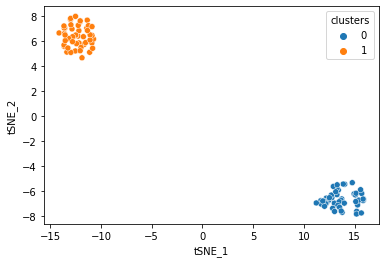

In [18]:
words_leukemia = top_cosine_similarities_leukemia.append(least_cosine_similarities_leukemia)
#words_leukemia_all = words_leukemia.append(close_to_zero_similarities_leukemia)
n= len(words_leukemia)
similar_words_embeddings_df = embeddings_similar_words(words_leukemia, n)
plot_tsne(similar_words_embeddings_df)

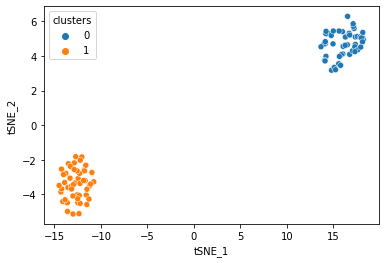

In [19]:
words_breast_cancer = top_cosine_similarities_bc.append(least_cosine_similarities_bc)
n=len(words_breast_cancer)
similar_words_embeddings_df_bc = embeddings_similar_words(words_breast_cancer, n)
plot_tsne(similar_words_embeddings_df_bc)

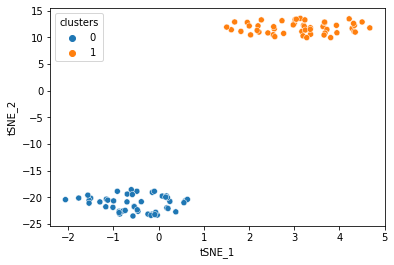

In [20]:
words_btk = top_cosine_similarities_btk.append(least_cosine_similarities_btk)
n=len(words_btk)
similar_words_embeddings_df_btk = embeddings_similar_words(words_btk, n)
plot_tsne(similar_words_embeddings_df_btk)